<a href="https://colab.research.google.com/github/CoDeRror555/Analytic_projects/blob/main/final_banking/final_banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект по А/B-тестированию

## Цель исследования:
   * **Провести оценку результатов A/B-теста**
    
## Задачи исследования:

* **Подготовка данных к анализу**
  * *Загрузка данных из предоставленного набора и проведение их описательного анализа*
  * *Обработка пропусков*
  * *Поиск явных и неявных дубликатов*
  * *Объединений и обогощение данных*
  * *Очистка данных*
* ****
* **Оценка корректности проведения теста**
  * *Выделить пользователей участвующих в тесте*
  * Удостоверитсья, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно.*
  * *Изучить данные о пользовательской активности*
  
* ****
* **Исследовательский анализ данных**
  * *Распределение количества событий на пользователя в разрезе групп теста*
  * *Определение интервалов количественных признаков с высоким уровнем оттока*
  * *Динамика количества событий в группах теста по дням*
  * *Продуктовная воронка*
  * *Общий вывод об изменении пользовательской активности в тестовой группе, по сравнению с контрольной.*
* ****
* **Оценка результатов A/B теста**
  * *Анализ распределения количественных признаковПроверьте статистическую разницу долей z-критерием.*
  * *Вывод о результатах проведения A/B теста*
  * *Рекомендации по результатам A/B теста*

# Библиотеки и функции

In [ ]:
# table
import numpy as np
import pandas as pd
# ploting
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go

# date and regular expressions
from datetime import datetime
import re

# math
import math as mth


# statistic
from scipy import stats as st

# sis
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')



In [ ]:
# функция для получения инфо о данных
def df_info(df:pd.DataFrame) -> None:
    '''Распечатывает информацию о датафрейме'''
    print(f"Количество полных дубликатов: {df.duplicated().sum()}")
    print('****************')

    # Выводим инфо
    df.info()


    # Сохраняем пропуски
    df_nans = np.trim_zeros(df.isna().mean().sort_values())

    if len(df_nans > 0):
        print('\nNA:',end='')
        display(df_nans)

    # Пример данных
    display(df.dropna().sample().T)

    for col in df.columns:
        if df[col].nunique() < 20:
            display(df[col].value_counts())

In [ ]:
# добавляет аннотации к барам
def add_value_labels(ax,bar_or_barh, space=4,fmt="{:.1f}"):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
        frm: format annotaitions
        bar_or_barh: chose bar or barh pyplot
    """
    if bar_or_barh == 'bar':
        # For each bar: Place a label
        heights = [rect.get_height() for rect in ax.patches]
        for rect in ax.patches:
            # Get X and Y placement of label from rect.
            y_value = rect.get_height()
            x_value = rect.get_x() + rect.get_width() / 2


            if y_value > 0:
                va = 'bottom'
                label = fmt.format(y_value)
                # Create annotation
                if y_value > max(heights)/2:
                    ax.annotate(
                        label,                      # Use `label` as label
                        (x_value, y_value/2),         # Place label at end of the bar
                        xytext=(0, space),          # Vertically shift label by `space`
                        textcoords="offset points", # Interpret `xytext` as offset in points
                        ha='center',                # Horizontally center label
                        va=va,
                        rotation=90,color='black',bbox = dict(boxstyle="round", fc="w", ec="0.99", alpha=0.7),size = 10)                      # Vertically align label differently for
                else:
                    ax.annotate(
                        label,                      # Use `label` as label
                        (x_value, rect.get_y()+rect.get_height()),         # Place label at end of the bar
                        xytext=(0, space),          # Vertically shift label by `space`
                        textcoords="offset points", # Interpret `xytext` as offset in points
                        ha='center',                # Horizontally center label
                        va=va,
                        rotation=90,size = 10)
            elif y_value == 0:
                va = 'top'
                label = fmt.format(y_value)
                ax.annotate(
                        label,                      # Use `label` as label
                        (x_value, rect.get_y()+rect.get_height()),         # Place label at end of the bar
                        xytext=(0, space),          # Vertically shift label by `space`
                        textcoords="offset points", # Interpret `xytext` as offset in points
                        ha='center',                # Horizontally center label
                        va='center',
                        rotation=90,size = 10)

            else:

                # Invert space to place label belo
                # Vertically align label at top
                va = 'top'
                # Use Y value as label and format number with one decimal place
                label = fmt.format(y_value)
                    # Create annotation
                if y_value < min(heights)/2:
                    ax.annotate(
                        label,                      # Use `label` as label
                        (x_value, y_value/2),         # Place label at end of the bar
                        xytext=(0, 0),          # Vertically shift label by `space`
                        textcoords="offset points", # Interpret `xytext` as offset in points
                        ha='center',                # Horizontally center label
                        va=va,
                        rotation=90,color='black',bbox = dict(boxstyle="round", fc="w", ec="0.99", alpha=0.7),size = 10)                      # Vertically align label differently for
                                                    # positive and negative values.
                else:
                    ax.annotate(
                        label,                      # Use `label` as label
                        (x_value, rect.get_y()+rect.get_height()),         # Place label at end of the bar
                        xytext=(0, 0),          # Vertically shift label by `space`
                        textcoords="offset points", # Interpret `xytext` as offset in points
                        ha='center',                # Horizontally center label
                        va=va,
                        rotation=90,size = 10)                      # Vertically align label differently for
                                                # positive and negative values.
    elif bar_or_barh == 'barh':

        # Получаем ширины столбиков
        widths = [rect.get_width() for rect in ax.patches]
        heights = [rect.get_height() for rect in ax.patches]
        # Добавляем аннотации на каждый столбик
        for i, rect in enumerate(ax.patches):
            # Перемещаем аннотацию внутрь столбика
            if widths[i] < 0:
                if widths[i] < min(widths)/2:
                    space *= -1
                    ax.annotate(fmt.format(widths[i]), xy=(widths[i]/2, rect.get_y() + rect.get_height()/2),\
                                xytext=(0, 0), textcoords="offset points", ha='center', va='center',color='black',bbox = dict(boxstyle="round", fc="w", ec="0.99", alpha=0.7),size = 10)
                else:
                    space *= -1
                    ax.annotate(fmt.format(widths[i]), xy=(rect.get_x() + rect.get_width(),rect.get_y() + rect.get_height() / 2),\
                            xytext=(space-3, 0), textcoords="offset points", ha='right', va='center',size = 10)

            elif widths[i] == 0:
                ax.annotate(fmt.format(widths[i]), xy=(widths[i],rect.get_y() + rect.get_height()/2),\
                            xytext=(0, 0), textcoords="offset points", ha='center', va='center',size = 10)

            elif widths[i] > 0:
                if widths[i] > max(widths)/2:
                    ax.annotate(fmt.format(widths[i]), xy=(widths[i]/2, rect.get_y() + rect.get_height()/2),\
                                xytext=(0, 0), textcoords="offset points", ha='center', va='center',color='black',bbox = dict(boxstyle="round", fc="w", ec="0.99", alpha=0.7),size = 10)

                else:
                    ax.annotate(fmt.format(widths[i]), xy=(rect.get_x() + rect.get_width(),rect.get_y() + rect.get_height() / 2),\
                            xytext=(space, 0), textcoords="offset points", ha='left', va='center',size = 10)
    else:
        return(print("inter name 'bar or bash'"))

# Получение и предобработка данных

In [ ]:
# загрузим данные
marketing_events = pd.read_csv('/datasets/ab_project_marketing_events.csv')
new_users = ab_project_marketing_events = pd.read_csv('/datasets/final_ab_new_users.csv')
events = pd.read_csv('/datasets/final_ab_events.csv')
participants = pd.read_csv('/datasets/final_ab_participants.csv')

## Таблица marketing_events

In [ ]:
display(marketing_events.info())
print("************************************")
display(marketing_events)
print(f"Количество дубликатов событий равно: {marketing_events['name'].duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


None

************************************


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


Количество дубликатов событий равно: 0


* **Таблица содержит данные о 14 уникальных маркетинговых событиях проводимых в разное времяв разных регионах. Значения дат начала и конца акции переведем в нужный формат для корректной работы с ними**

## Таблица new_users

In [ ]:
# отобразим основную информацию
display(new_users.info())
print("************************************")
display(new_users.head())
print(f"Количество дубликатов user_id в таблице равно: {new_users['user_id'].duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


None

************************************


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


Количество дубликатов user_id в таблице равно: 0


* **Можно заметить отсутствие пропусков и дубликатов, а таже неверный формат дат. Всего представлено 61733 уникальных пользователя**

In [ ]:
# приведем к нужному формату дату
new_users.first_date = pd.to_datetime(new_users.first_date)

In [ ]:
# применим функцию для получения углуюленной информации о наборе
df_info(new_users)

Количество полных дубликатов: 0
****************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     61733 non-null  object        
 1   first_date  61733 non-null  datetime64[ns]
 2   region      61733 non-null  object        
 3   device      61733 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.9+ MB


,17083
user_id,A865607AF1C4AAC5
first_date,2020-12-21 00:00:00
region,EU
device,Android


2020-12-21    6290
2020-12-14    5654
2020-12-07    5595
2020-12-13    4691
2020-12-20    4288
2020-12-12    3963
2020-12-19    3617
2020-12-18    3365
2020-12-08    3239
2020-12-22    3083
2020-12-10    3076
2020-12-17    3048
2020-12-15    3043
2020-12-11    2390
2020-12-23    2180
2020-12-16    2110
2020-12-09    2101
Name: first_date, dtype: int64

EU           46270
N.America     9155
CIS           3155
APAC          3153
Name: region, dtype: int64

Android    27520
PC         15599
iPhone     12530
Mac         6084
Name: device, dtype: int64

* **Можно заметить что дынные представлены за декабрь 2020 года, что есть не самое подходяшие время для проведение A/B тестов ввиду большого количества событий в этого время и как следствие, изменения модели поведения покупателей. Также мы видем, что пользователи относятся к 4 регионам, но подавляющее их число в нашем наборе представляют европейский регион - 46 270 против 15 463 в остальных. Основная часть пользователий используют андройд платформу.**

## Таблица events

In [ ]:
# отобразим основную информацию
display(events.info())
print("************************************")
display(events.head())
print(f"Количество дубликатов user_id в таблице равно: {events['user_id'].duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


None

************************************


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


Количество дубликатов user_id в таблице равно: 381614


* **Данные представлены 440317 событиями, для каждого пользователя может быть их разное количество. Можно заметить неверный формат даты а также большое количество пропусков в поле с детялями события, последнее можно обьяснить наличием событий без деталей**

In [ ]:
# приведем к нужному формату дату
events.event_dt = pd.to_datetime(events.event_dt)

In [ ]:
# применим функцию для получения углуюленной информации о наборе
df_info(events)

Количество полных дубликатов: 0
****************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     440317 non-null  object        
 1   event_dt    440317 non-null  datetime64[ns]
 2   event_name  440317 non-null  object        
 3   details     62740 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.4+ MB

NA:

details    0.857512
dtype: float64

,46514
user_id,2B4F8C98F1307705
event_dt,2020-12-22 20:41:27
event_name,purchase
details,9.99


login           189552
product_page    125563
purchase         62740
product_cart     62462
Name: event_name, dtype: int64

4.99      46362
9.99       9530
99.99      5631
499.99     1217
Name: details, dtype: int64

* **Можно обратить внимание, что в данных 4 уникальных события это login, product_page, product_cart, product_cart причем регистраций кратно больше чем просмотров карзины и покупок. Так же мы видим что количество значений без пропусков равно количеству покупок, из чего следует что поле с деталями может содержать сумму потраченную на покупку товара, которая в свою очередь представлена 4 уникальными значениями.**

In [ ]:
# проверка предположения о природе пропусков в поле ditails
display(events[events['event_name'] != 'purchase'].info())
print('************************')
display(events[events['event_name'] == 'purchase'].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377577 entries, 62740 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     377577 non-null  object        
 1   event_dt    377577 non-null  datetime64[ns]
 2   event_name  377577 non-null  object        
 3   details     0 non-null       float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 14.4+ MB


None

************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 62740 entries, 0 to 62739
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     62740 non-null  object        
 1   event_dt    62740 non-null  datetime64[ns]
 2   event_name  62740 non-null  object        
 3   details     62740 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 2.4+ MB


None

* **Можно заметить, что все пропуски не принадлежат покупкам, значит детали это стоимость покупки**

## Таблица participants

In [ ]:
# отобразим основную информацию
display(participants.info())
print("************************************")
display(participants.head())
print(f"Количество дубликатов user_id в таблице равно: {participants['user_id'].duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


None

************************************


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


Количество дубликатов user_id в таблице равно: 1602


* **Пропусков нет, форматы верные. Количество дублей пользователей 1602, что может говорить либо о некорректном наборе участников либо о присутствии в данных лишней информации. Необходима проверка**

In [ ]:
# применим функцию для получения углуюленной информации о наборе
df_info(participants)

Количество полных дубликатов: 0
****************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


,8322
user_id,493A30FD34A0E321
group,B
ab_test,interface_eu_test


A    9655
B    8613
Name: group, dtype: int64

interface_eu_test          11567
recommender_system_test     6701
Name: ab_test, dtype: int64

* **Мы видим, что основная часть набора участвовала в нецелевом тесте исследования, полные дубли отсутствуют. Общее количество участников тестирований в группе в незначительно меньше группы а. Необходима проверка пересечения групп пользователей между тестами.**

# Вывод по итогам предобработки
* **Таблица marketing_events**
* **Таблица содержит данные о 14 уникальных маркетинговых событиях проводимых в разное времяв разных регионах. Значения дат начала и конца акции переведем в нужный формат для корректной работы с ними**
* **Таблица new_users**
* **Можно заметить отсутствие пропусков и дубликатов, а таже неверный формат дат. Всего представлено 61733 уникальных пользователя**
* **Можно заметить что дынные представлены за декабрь 2020 года, что есть не самое подходяшие время для проведение A/B тестов ввиду большого количества событий в этого время и как следствие, изменения модели поведения покупателей. Также мы видем, что пользователи относятся к 4 регионам, но подавляющее их число в нашем наборе представляют европейский регион - 46 270 против 15 463 в остальных. Основная часть пользователий используют андройд платформу.**
* **Таблица events**
* **Данные представлены 440317 событиями, для каждого пользователя может быть их разное количество. Можно заметить неверный формат даты а также большое количество пропусков в поле с детялями события, последнее можно обьяснить наличием событий без деталей**
* **Можно обратить внимание, что в данных 4 уникальных события это login, product_page, product_cart, product_cart причем регистраций кратно больше чем просмотров карзины и покупок. Так же мы видим что количество значений без пропусков равно количеству покупок, из чего следует что поле с деталями может содержать сумму потраченную на покупку товара, которая в свою очередь представлена 4 уникальными значениями.**
* **Таблица participants**
* **Пропусков нет, форматы верные. Количество дублей пользователей 1602, что может говорить либо о некорректном наборе участников либо о присутствии в данных лишней информации. Необходима проверка**
* **Мы видим, что основная часть набора участвовала в нецелевом тесте исследования, полные дубли отсутствуют. Общее количество участников тестирований в группе в незначительно меньше группы а. Необходима проверка пересечения групп пользователей между тестами.**


# Оценка корректности проведения теста

## Выделим пользователей учавствовавших в тестах

In [ ]:
# объеденим наборы данных для выделения нужных пользовтелей
df = pd.merge(new_users, participants,how = 'left',validate = '1:m', left_on='user_id', right_on='user_id',suffixes=('', 'part'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63335 entries, 0 to 63334
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     63335 non-null  object        
 1   first_date  63335 non-null  datetime64[ns]
 2   region      63335 non-null  object        
 3   device      63335 non-null  object        
 4   group       18268 non-null  object        
 5   ab_test     18268 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 3.4+ MB


### Определим региональную пренадлежность

In [ ]:
# посчитаем уникальных пользователей по регионам и группам теста пользователей
df[~df['group'].isna()&(df['ab_test'] == 'recommender_system_test')].groupby(by=['region','group']).nunique()['user_id']

region     group
APAC       A          37
           B          35
CIS        A          25
           B          30
EU         A        3634
           B        2717
N.America  A         128
           B          95
Name: user_id, dtype: int64

* **В целевую группу попали пользователи не только из исследуемого региона, необходимо очистить данные. Распределение по группам также неравномерно**

### Проверим корректность периода набора пользователей для теста

In [ ]:
print(f"Пользователи набраны от {df[~df['group'].isna()&(df['ab_test'] == 'recommender_system_test')]['first_date'].min().date()}\
 и до {df[~df['group'].isna()&(df['ab_test'] == 'recommender_system_test')]['first_date'].max().date()}")

Пользователи набраны от 2020-12-07 и до 2020-12-21


* **Пользователи набраны согласно т.з с 7 по 21 число включительно. Период проведения A/B теста выбран не совсем корректно, ввиду предновогоднего изменения модели поведения покупателей и большого количества маркетинговых акций проводимых в это время**

### Проверим долю набранных пользователей от общего числа зарегестрированных в период проведения теста по региону EU

In [ ]:
# посчитаем долю по набору
share = df[~df['group'].isna()&(df['ab_test'] == 'recommender_system_test')&(df['region'] =='EU')].groupby(by='region')['user_id'].nunique()/\
df[(df['first_date'] >=pd.to_datetime('2020-12-07'))&(df['first_date'] <=pd.to_datetime('2020-12-21'))&(df['region'] =='EU')].groupby(by='region')['user_id'].nunique()

display(share)

region
EU    0.15
Name: user_id, dtype: float64

* **Доля пользователей набрана корректно согласно техническому заданию**

### Посмотрим на динамику набора в группы теста и на равномерность их наполнения

In [ ]:
# Выделим данные
a = df[~df['group'].isna()&(df['ab_test'] == 'recommender_system_test')&(df['region'] =='EU')&(df['group']=='A')].\
groupby('first_date').nunique()['user_id']

b = df[~df['group'].isna()&(df['ab_test'] == 'recommender_system_test')&(df['region'] =='EU')&(df['group']=='B')].\
groupby('first_date').nunique()['user_id']

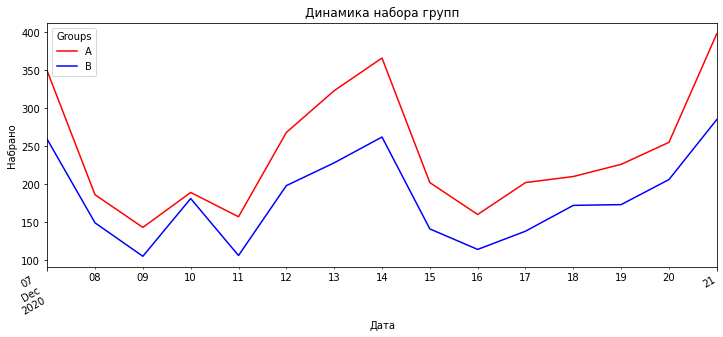

In [ ]:
# строим график
plt.figure(figsize=(12,5))
a.plot(color = 'red')
b.plot(color = 'blue')
plt.xlabel('Дата')
plt.ylabel('Набрано')
plt.legend(['A','B'], title='Groups')
plt.gcf().autofmt_xdate()
plt.title('Динамика набора групп')
plt.show()

* **Можно заметить, что пользователи набираласть в группы циклично, на выходных проходил рост набора. Также мы видим, что в группу а попадало стабильно больше пользвателей относительно контрольной группы, ввиду чего пропорциональность групп не была соблюдена**

### Ноложение маркетинговых компаний на период проведения теста

In [ ]:
# приведем к нужному формату дату
marketing_events.start_dt = pd.to_datetime(marketing_events.start_dt)
marketing_events.finish_dt = pd.to_datetime(marketing_events.finish_dt)

# выделим компании затрагивающие уевропейский рынок
marketing_events = marketing_events[marketing_events['regions'].apply(lambda sentence: any(word in sentence.lower() for word in ['eu']))]

In [ ]:
marketing_events = marketing_events.drop('regions', axis = 1).T
marketing_events.columns = marketing_events.iloc[0]
marketing_events  = marketing_events.drop('name')
display(marketing_events)

name,Christmas&New Year Promo,St. Valentine's Day Giveaway,St. Patric's Day Promo,Easter Promo,Black Friday Ads Campaign,Labor day (May 1st) Ads Campaign,International Women's Day Promo
start_dt,2020-12-25 00:00:00,2020-02-14 00:00:00,2020-03-17 00:00:00,2020-04-12 00:00:00,2020-11-26 00:00:00,2020-05-01 00:00:00,2020-03-08 00:00:00
finish_dt,2021-01-03 00:00:00,2020-02-16 00:00:00,2020-03-19 00:00:00,2020-04-19 00:00:00,2020-12-01 00:00:00,2020-05-03 00:00:00,2020-03-10 00:00:00


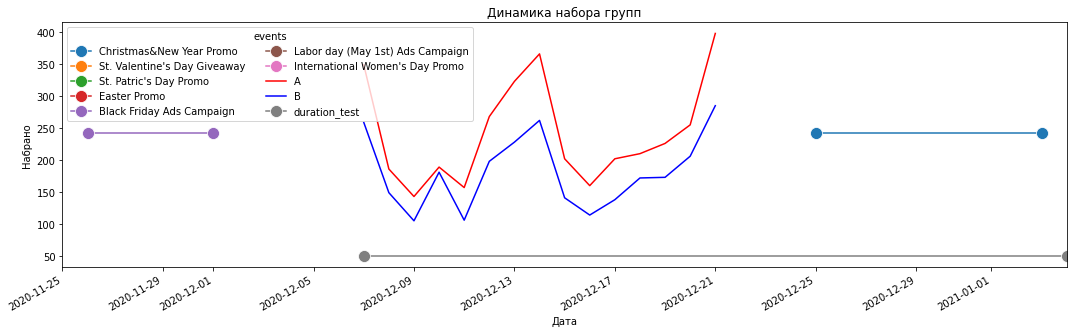

In [ ]:
# строим график
plt.figure(figsize=(18,5))

for i in marketing_events.columns:

    sns.lineplot(marketing_events[i], y = a.mean(), legend = True, marker='o',markersize = 12)
a.plot(color = 'red')
b.plot(color = 'blue')
sns.lineplot([pd.to_datetime('2020-12-07'),pd.to_datetime('2021-01-04')], y = 50, legend = True, marker='o',markersize = 12)
plt.xlabel('Дата')
plt.ylabel('Набрано')
plt.legend(list(marketing_events.columns)+['A']+['B']+['duration_test'], title='events',ncol = 2)
plt.gcf().autofmt_xdate()
plt.title('Динамика набора групп')
plt.xlim(pd.to_datetime('2020-11-25'),pd.to_datetime('2021-01-04') )

plt.show()

* **Можно заметить, что маркетинговые cобытия не пересекают период набора пользователей, однако одно событие (Christmas&New Year Promo) накладывается на период наблюдения и сбора статистики активности, что может исказить результаты. Необходимо обратить внимание на изменения активности с 25 числа**

### Анализ пересечения пользователей внутри групп теста, а также между тестами

* **Критичным будем считать пересечение пользователей между группами внутри теста, а также пересечение испытуемой группы смежного теста с нашим. Пересечение контрольной группы смежного теста с группами нашего целевого будем считать допустимым так как они не подвергались дополнительному воздействию эксперементов.**

#### Пересечения пользователей между группами внутри теста

In [ ]:
# выделим пользователей группы а
a = participants[(participants['ab_test']=='recommender_system_test')&(participants['group']=='A')]['user_id'].unique()

In [ ]:
# посмотрим на пересечение внутри теста
participants[(participants['ab_test']=='recommender_system_test')&(participants['group']=='B')].query("user_id in @a")

,user_id,group,ab_test


* **Пересечение пользователей внутри теста между контрольной и тестовой группой нет**

#### Пересечения пользователей между тестами, фокус на контрольную группу смежного теста

In [ ]:
# выделим пользователей контрольной группы смежног сеста
bad = participants[(participants['ab_test']=='interface_eu_test')&(participants['group']=='B')]['user_id'].unique()

In [ ]:
# посчитаем доли пересечения в целевом тесте по группам (B)
len(participants[(participants['ab_test']=='recommender_system_test')&(participants['group']=='B')].query("user_id in @bad ")['user_id'].unique())/\
len(participants[(participants['ab_test']=='recommender_system_test')&(participants['group']=='B')]['user_id'].unique())

0.11956899548140425

In [ ]:
# посчитаем доли пересечения в целевом тесте по группам (A)
len(participants[(participants['ab_test']=='recommender_system_test')&(participants['group']=='A')].query("user_id in @bad ")['user_id'].unique())/\
len(participants[(participants['ab_test']=='recommender_system_test')&(participants['group']=='A')]['user_id'].unique())

0.11480125523012552

* **Доля пользователей подвергшихся воздействию смежного теста в обеих группах примерно равна и состовляет порядка 11%, ввиду чего можно считать воздействие на группы этого факта также равномерным. Поэтому, исходя из ограниченного размера груп, возможно оставить таких пользователей, для придания большей мощности нашей аналитики**

In [ ]:
# выделим пользователей контрольной группы смежног сеста
bad = participants[(participants['ab_test']=='interface_eu_test')&(participants['group']=='A')]['user_id'].unique()

In [ ]:
# посчитаем доли пересечения в целевом тесте по группам (B)
len(participants[(participants['ab_test']=='recommender_system_test')&(participants['group']=='B')].query("user_id in @bad ")['user_id'].unique())/\
len(participants[(participants['ab_test']=='recommender_system_test')&(participants['group']=='B')]['user_id'].unique())

0.11713590545707334

In [ ]:
# посчитаем доли пересечения в целевом тесте по группам (A)
len(participants[(participants['ab_test']=='recommender_system_test')&(participants['group']=='A')].query("user_id in @bad ")['user_id'].unique())/\
len(participants[(participants['ab_test']=='recommender_system_test')&(participants['group']=='A')]['user_id'].unique())

0.1260460251046025

* **Доля пользователей не подвергшихся воздействию смежного теста в обеих группах примерно равна и состовляет также порядка 12%, ввиду чего можно считать воздействие на группы этого факта также равномерным. Поэтому, исходя из ограниченного размера груп, возможно оставить таких пользователей, для придания большей мощности нашей аналитики**

## Пользовательская активность

In [ ]:
# очистим основную выборку
df = df[(df['region']=='EU')&(df['ab_test']=='recommender_system_test')]

In [ ]:
# обогатим данные записями о активности пользователей
df = pd.merge(df, events,how = 'left',validate = '1:m', left_on='user_id', right_on='user_id',suffixes=('', 'events'))

In [ ]:
# посмотрим на основную информацию после объединения
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26290 entries, 0 to 26289
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     26290 non-null  object        
 1   first_date  26290 non-null  datetime64[ns]
 2   region      26290 non-null  object        
 3   device      26290 non-null  object        
 4   group       26290 non-null  object        
 5   ab_test     26290 non-null  object        
 6   event_dt    23420 non-null  datetime64[ns]
 7   event_name  23420 non-null  object        
 8   details     3196 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 2.0+ MB


None

* **Пользователи попавшие в тест совершили 26290 события из которых 3196 покупки. Можно заметить наличие пропусков после объедененеия по полям из контрольной таблицы, что говорит о том, что некоторые пользователи из группы теста не совершили не одного события.**

In [ ]:
# добавим поле с точной датой первого события пользователей
df = pd.merge(df, df.groupby('user_id', as_index = False).agg(first_ev = ('event_dt','min')),how = 'left',validate = 'm:1', left_on='user_id', right_on='user_id',suffixes=('', 'first_events'))

# добавим поле с округленной до дней датой событий
df['date'] = df.event_dt.astype('datetime64[D]')

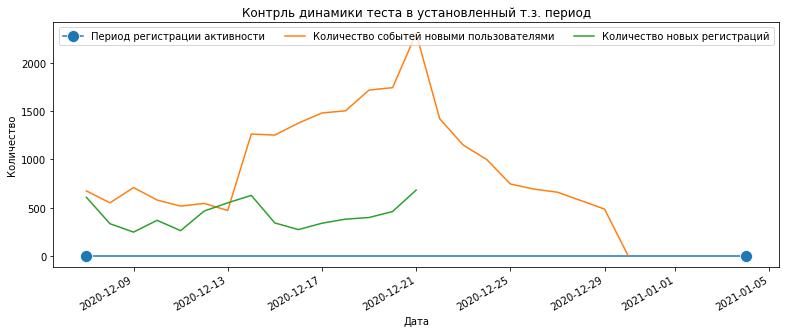

In [ ]:
# строим график
plt.figure(figsize=(13,5))

sns.lineplot([pd.to_datetime('2020-12-07'),pd.to_datetime('2021-01-04')], y = 1, legend = True, marker='o',markersize = 12)
df.groupby(by = 'date')['user_id'].count().plot()
df.groupby(by = 'first_date')['user_id'].nunique().plot()
plt.legend(['Период регистрации активности','Количество событей новыми пользователями','Количество новых регистраций'],ncol = 3)
plt.title('Контроль динамики теста в установленный т.з. период')
plt.ylabel('Количество')
plt.xlabel('Дата')
plt.gcf().autofmt_xdate()
plt.show()

* **На графике видно, что период активности группы тета совподает с периодом регистрации пользователей и периодом наблюдения за ними. Активность пользователей растет вплодь до остановки набора пользователей в группы, причем можно заметит скачек активности 13 числа. Также мы можем наблюдать, что после остановки набора теста октивность пользователей резко снижается вплодь до 30 числа, а последнии 4 дня наблюдений и вовсе отсутствует, что может говорить о несвоевременной остановке теста, либо о новогодних каникулах. Возможность для совершения событий последних зарегестрированных пользователей состовляет 2 недели(если тест не был досрочно остановлен, при обратном сценарии необходимо корректировать после онализа распределений сроков целевых событий). Ввиду большого количества пользователей без наличия целевых действей есть смысл провести динамику набора последних. Существенных всплесков активности в период проведения пересекающеся акции нет**

## Динамика набора пользователей не совершивших ни одного целевого действия в разрезе групп теста

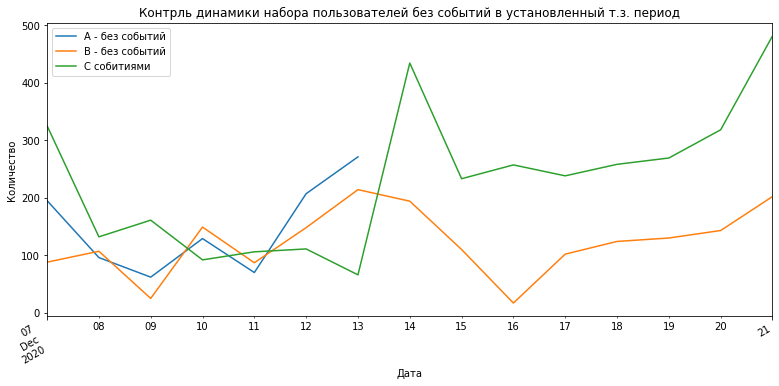

In [ ]:
# строим график
plt.figure(figsize=(13,6))
#sns.lineplot([pd.to_datetime('2020-12-07'),pd.to_datetime('2021-01-04')], y = 2, legend = True, marker='o',markersize = 12)
df[df['event_name'].isna()&(df['group']=='A')].groupby(by = 'first_date')['user_id'].nunique().plot()
df[df['event_name'].isna()&(df['group']=='B')].groupby(by = 'first_date')['user_id'].nunique().plot()
df[~df['event_name'].isna()].groupby(by = 'first_date')['user_id'].nunique().plot()
plt.legend(['A - без событий','B - без событий', "С собитиями"])
plt.title('Контрль динамики набора пользователей без событий в установленный т.з. период')
plt.ylabel('Количество')
plt.xlabel('Дата')
plt.gcf().autofmt_xdate()
plt.show()

* **Можно заметить, что пользователи не совершившие не одного действия набирались в весь период, причем набор проходил схожим образом в обеих группах. В контрольной группйе после 13 числа наблюдается отсутствие притока клиентов без активности, что довально странно, в группы у неактивных пользователей проходит относительно равномерно на протяжении всего теста.**

In [ ]:
# послитаем доллю пользователей без покупок в группе B
df[df['event_name'].isna()&(df['group']=='B')].groupby(by = 'first_date')['user_id'].nunique().sum()/df[(df['group']=='B')].groupby(by = 'first_date')['user_id'].nunique().sum()

0.6772175193227825

* **Доля пользователей без событей в эксперементальной группе равна 68%**

In [ ]:
# послитаем доллю пользователей без покупок в группе B
df[df['event_name'].isna()&(df['group']=='A')].groupby(by = 'first_date')['user_id'].nunique().sum()/df[(df['group']=='A')].groupby(by = 'first_date')['user_id'].nunique().sum()

0.28343423225096315

* **Доля пользователей без событей в контрольной группе равна 28%**

* **Пользователей без событий не конвертировались, поэтому  для исследовательского анализа они полезны**

In [ ]:
df = df[~df['event_name'].isna()]

## Определений соответствия лайфтайма события т.з

In [ ]:
# сформируем поле со сркоким событий от даты регистрации
df['event_life'] = df['event_dt'] - df['first_date']
df['event_life'] = df['event_life'].dt.days

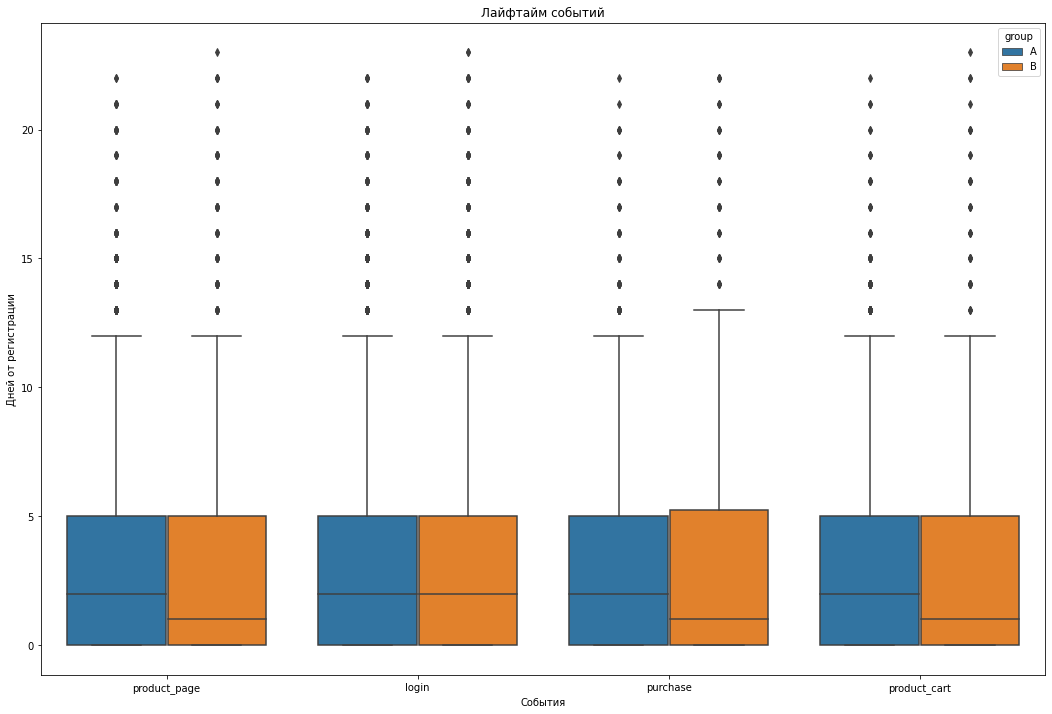

************************************


count    23420.000000
mean         3.300470
std          4.132073
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max         23.000000
Name: event_life, dtype: float64

In [ ]:
# построим графики распределения периодов событий от даты регистрации
plt.figure(figsize=(18, 12))
sns.boxplot(y = df['event_life'], x = df['event_name'], hue = df['group'])
plt.xlabel('События')
plt.ylabel('Дней от регистрации')
plt.title('Лайфтайм событий')
plt.show()
print("************************************")
display(df['event_life'].describe())

* **Основная чесь всех событий совершается в период до 5 дней, однако по каждому виду событий видны выбросы за периодом установленного т.з. лайфтайма события. Также мы можем заметить снижение средних сроков до покупки, просмотра карточки и просмотра карзины в эксперементальной группе.**

In [ ]:
# уберем события не соответствующие т.з.
df = df[df['event_life']<=14]

## Распределение доли первых событий по группам

In [ ]:
# выделим данные
f = df.groupby(by='user_id').first().reset_index().pivot_table(index='event_name', columns='group', values='user_id', aggfunc= 'nunique')
display(f)

group,A,B
event_name,,
login,484,211
product_cart,521,169
product_page,766,248
purchase,833,249


In [ ]:
# посчитаем доли от общего в группе
f['A'] = f['A']/f['A'].sum()
f['B'] = f['B']/f['B'].sum()

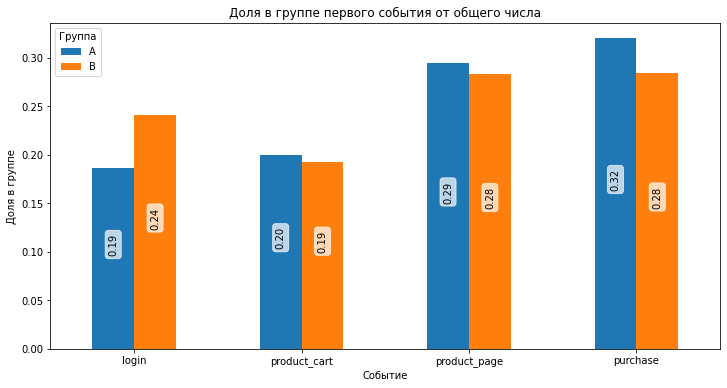

In [ ]:
# построим график
ax = f.plot(kind='bar',figsize=(12,6))
plt.legend(['A', 'B'], title = 'Группа')
plt.ylabel('Доля в группе')
plt.xlabel('Событие')
plt.xticks(rotation=(0))
plt.title("Доля в группе первого события от общего числа")
add_value_labels(ax,'bar',3,fmt = "{:.2f}")
plt.show()

* **Можно заметить, что доля клиентов с первой покупкой на 5% выше в группе А и состовляет 32%, тогда как в группе B больше на 5%  доля первых логинов. В ообщем мы можем наблюдать довольно высокую долю клиентов с первым событием - покупкой порядка 30% по общей выборке.**

# Вывод по итогам оценки корректности проведения теста
* **В целевую группу попали пользователи не только из исследуемого региона, необходимо очистить данные. Распределение по группам также неравномерно**
* **Пользователи набраны согласно т.з с 7 по 21 число включительно. Период проведения A/B теста выбран не совсем корректно, ввиду предновогоднего изменения модели поведения покупателей и большого количества маркетинговых акций проводимых в это время**
* **Доля пользователей набрана корректно согласно техническому заданию**
* **Можно заметить, что пользователи набиралось в группы циклично, на выходных проходил рост набора. Также мы видим, что в группу, а попадало стабильно больше пользователей относительно контрольной группы, ввиду чего пропорциональность групп не была соблюдена**
* **Можно заметить, что маркетинговые cобытия не пересекают период набора пользователей, однако одно событие (Christmas&New Year Promo) накладывается на период наблюдения и сбора статистики активности, что может исказить результаты. Необходимо обратить внимание на изменения активности с 25 числа**
* **Пересечение пользователей внутри теста между контрольной и тестовой группой нет**
* **Критичным будем считать пересечение пользователей между группами внутри теста, а также пересечение испытуемой группы смежного теста с нашим. Пересечение контрольной группы смежного теста с группами нашего целевого будем считать допустимым так как они не подвергались дополнительному воздействию экспериментов.**
* **Доля пользователей подвергшихся воздействию смежного теста в обеих группах примерно равна и составляет порядка 5%, ввиду чего можно считать воздействие на группы этого факта также равномерным. Поэтому, исходя из ограниченного размера груп, возможно оставить таких пользователей, для придания большей мощности нашей аналитики**
* **Пользователи, попавшие в тест, совершили 26290 события из которых 3196 покупки. Можно заметить наличие пропусков после объединение по полям из контрольной таблицы, что говорит о том, что некоторые пользователи из группы теста не совершили не одного события.**
* **Период активности группы тета совпадает с периодом регистрации пользователей и периодом наблюдения за ними. Активность пользователей растет вплоть до остановки набора пользователей в группы, причем можно заметит скачек активности 13 числа. Также мы можем наблюдать, что после остановки набора теста активность пользователей резко снижается вплоть до 30 числа, а последние 4 дня наблюдений и вовсе отсутствует, что может говорить о несвоевременной остановке теста, либо о новогодних каникулах. Возможность для совершения событий последних зарегистрированных пользователей составляет 2 недели(если тест не был досрочно остановлен, при обратном сценарии необходимо корректировать после анализа распределений сроков целевых событий). Ввиду большого количества пользователей без наличия целевых действий есть смысл провести динамику набора последних. Существенных всплесков активности в период проведения пересекающейся акции нет**
* **Можно заметить, что пользователи не совершившие не одного действия набирались в весь период, причем набор проходил схожим образом в обеих группах. В контрольной группе после 13 числа наблюдается отсутствие притока клиентов без активности, что довольно странно, в группы у неактивных пользователей проходит относительно равномерно на протяжении всего теста.**
* **Доля пользователей без событий в экспериментальной группе равна 68%**
* **Доля пользователей без событий в контрольной группе равна 28%**
* **Основная честь всех событий совершается в период до 5 дней, однако по каждому виду событий видны выбросы за периодом установленного т.з. Лайф тайма события. Также мы можем заметить снижение средних сроков до покупки, просмотра карточки и просмотра корзины в экспериментальной группе.**
* **Можно заметить, что доля клиентов с первой покупкой на 5% выше в группе А и составляет 32%, тогда как в группе B больше на 5%  доля первых логинов. В общем мы можем наблюдать довольно высокую долю клиентов с первым событием - покупкой порядка 30% по общей выборке.**

# Исследовательский анализ данных

In [ ]:
# выделим данные для анализа

test = df.fillna(0).groupby(by = ['date','user_id','group']).agg(device_c =('device','nunique'), device=('device','first'),number_events = ('event_name', 'count'),\
                                         number_unique_ev = ('event_name', 'nunique'),sum_purch=('details','sum')).reset_index()

In [ ]:
# поставим маркер покупки
test['purch_fact'] = test.sum_purch != 0
test['purch_fact'] = test['purch_fact'] *1

In [ ]:
# посмотрим инво о тестовых чистых данных
df_info(test)

Количество полных дубликатов: 0
****************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10323 entries, 0 to 10322
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              10323 non-null  datetime64[ns]
 1   user_id           10323 non-null  object        
 2   group             10323 non-null  object        
 3   device_c          10323 non-null  int64         
 4   device            10323 non-null  object        
 5   number_events     10323 non-null  int64         
 6   number_unique_ev  10323 non-null  int64         
 7   sum_purch         10323 non-null  float64       
 8   purch_fact        10323 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 726.0+ KB


,5612
date,2020-12-19 00:00:00
user_id,C80F781D9C410363
group,A
device_c,1
device,Android
number_events,3
number_unique_ev,3
sum_purch,0.0
purch_fact,0


A    7969
B    2354
Name: group, dtype: int64

1    10323
Name: device_c, dtype: int64

Android    4555
PC         2692
iPhone     2125
Mac         951
Name: device, dtype: int64

2    4426
3    3081
1    2177
4     639
Name: number_events, dtype: int64

2    4426
3    3081
1    2177
4     639
Name: number_unique_ev, dtype: int64

0.00      7200
4.99      2327
9.99       467
99.99      272
499.99      57
Name: sum_purch, dtype: int64

0    7200
1    3123
Name: purch_fact, dtype: int64

* **Можно заметить, что группы распределились неравномерно, количество пользователей эксперементальной группы кратно меньше контрольной. Также можно обратить внимание на факт использование одного устроиства всеми пользователями, что говорит о отслеживании активности пользователей по нему. Основная часть пользуется android устроиствами, тогда как mac самый непопулярный. Пользователи совершают разное количество целевых действий, но сновная часть ограничевается 2, также мы видим внушительную группу пользователей совершивших всего одно действие, возможно это быстрая покупка. В общей выборке  1082 пользователя из 3481 совершили покупки**

## Анализ распределения признаков и активностей по группам теста

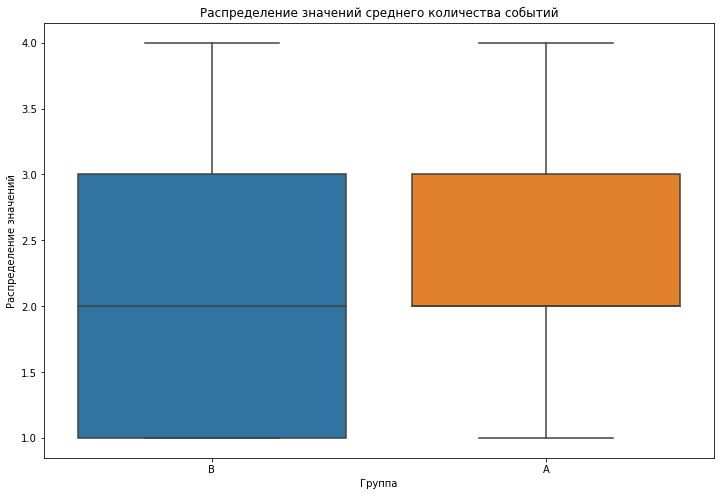

**********Статистика А***********************


count    7969.000000
mean        2.255866
std         0.840378
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: number_events, dtype: float64

**********Статистика B***********************


count    2354.000000
mean        2.060748
std         0.838997
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: number_events, dtype: float64

In [ ]:
# построим график
plt.figure(figsize=(12,8))
sns.boxplot(y = test.number_events, x = test.group)
plt.ylabel('Распределение значений')
plt.xlabel('Группа')
plt.title("Распределение значений среднего количества событий")
plt.show()


print('**********Статистика А***********************')
display(test[test['group']=='A']['number_events'].describe())
print('**********Статистика B***********************')
display(test[test['group']=='B']['number_events'].describe())

* **В испытуемой группе заметно ниже среднее число событей на пользователя, есть смысл проверить статистическую значимось данной данного вывода**

### Проверка статистической значимости различия средних значений количества событий на пользователя в группах теста

* **При выборе инструмента проверки статистических гипотез будем опираться на определение центральной предельной теоремы которое говорит о том, что при оценке среднего значения генеральной совокупности выборочные средние нормально распределены вокруг среднего всей совокупности независимо от того, как распределена сама генеральная совокупность, а также если некоторая доля генеральной совокупности обладает признаком, а другая её часть — нет, об этой доле можно судить по выборке из генеральной совокупности, выборочные доли будут нормально распределены вокруг настоящей. Исходя из того, что наша выборка имеет существенный размер для работы ЦПТ мы выберим z-test для определения различий в долях и ttest для определения различий средних значений, при условии что дисперсии выборок равны**

#### Гипотеза:
* **Средние значения количества событей активности на пользователя в группах теста различаются**

H0 - статистически значимых различий в средних количествах событей между группами теста нет  
****
H1 - присутствуют статистически значимые различия в средних количествах событей между группами теста
****

критический уровень значимости alpha = 0.05

#### Формирование семплов для проведения статистического теста

In [ ]:
# выделим данные
test_a = test.loc[test['group']=='A']['number_events']
test_b = test.loc[test['group']=='B']['number_events']

In [ ]:
# проведем тест Шапиро-Уилка для определения нармальности распределений
result = st.shapiro(test_a)
result
print(f'Значение p-value для test_a: {result[1]}')
result = st.shapiro(test_b)
result
print(f'Значение p-value для test_b: {result[1]}')

Значение p-value для test_a: 0.0
Значение p-value для test_b: 2.4606801033543788e-42


* **По результатам теста можно с уверенностью сказать что выборки ненормально распределены, однако, опираясь на понятие центральной предельной теоремы возможно использовать ttest, но с поправкой на независимость выборок**

In [ ]:
print(f"Отношение большей к меньшей дисперсий: {round(test_a.var()/test_b.var(), 2)}")

Отношение большей к меньшей дисперсий: 1.0


In [ ]:
# проведем статистический тест
alpha = 0.05
results = st.ttest_ind(test_a, test_b, equal_var= False)
print('**************************************')
print(f'p-значение равно: ', results.pvalue)
if results.pvalue < alpha:
  print('Отвергаем нулевую гипотезу')
else:
  print('Не получилось отвергнуть нулевую гипотезу')

**************************************
p-значение равно:  7.048767657073385e-23
Отвергаем нулевую гипотезу


* **По результатам теста мы видим, что уровень статистической значимости ниже выбранного значения alpha, поэтому у нас есть основания отвергнуть H0 гипотезу, статистически значимые различия в средних количествах событей на клиента в группах теста есть**

## Анализ динамики среднего количества событий на пользователся в группах теста по дням

In [ ]:
# выделим данные
t = test.groupby(by=['group','date'])[['number_events','purch_fact','sum_purch']].mean().reset_index()

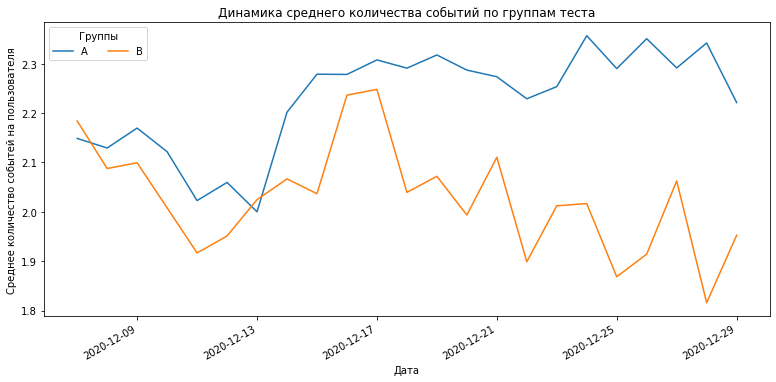

In [ ]:
# строим график
plt.figure(figsize=(13,6))
sns.lineplot(x = t['date'], y = t['number_events'] , hue = t['group'])
plt.legend(['А','B'], title='Группы',ncol = 3)
plt.title('Динамика среднего количества событий по группам теста')
plt.ylabel('Среднее количество событей на пользователя')
plt.xlabel('Дата')
plt.gcf().autofmt_xdate()
plt.show()

* **Можно заметить стабально выше показатель активнтсти на пользователся в группе А а также всплеск в обеих группах 13 числа, что может быть связанно с повышенным притоком новых пользователей в этот момент. После всплеска показатель группы А остается на повышенном значении, а группы B планомерно снижается до конца наблюдений.**

## Анализ доли новых клиентов совершающих покупки в разрезе групп

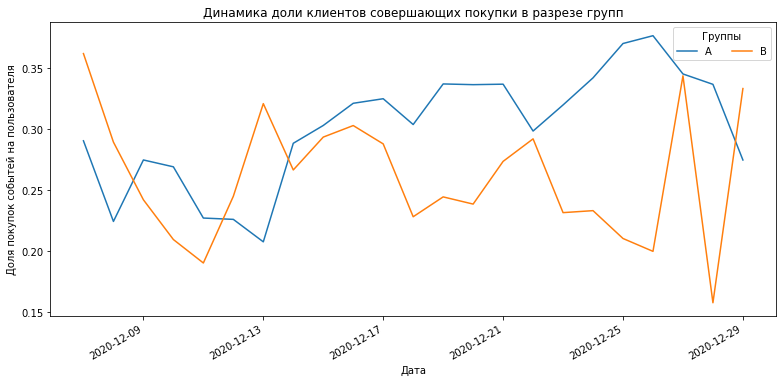

In [ ]:
# строим график
plt.figure(figsize=(13,6))
sns.lineplot(x = t['date'], y = t['purch_fact'] , hue = t['group'])
plt.legend(['А','B'], title='Группы',ncol = 3)
plt.title('Динамика доли клиентов совершающих покупки в разрезе групп')
plt.ylabel('Доля покупок событей на пользователя')
plt.xlabel('Дата')
plt.gcf().autofmt_xdate()
plt.show()

* **На графике можно заметить, что в изменении доли платящих пользователей нет четкой динамики и существенных различий в обоих группах**

## Анализ динамики общего числа событий во времени в разрезе групп

In [ ]:
# выделим данные
t = test.groupby(by=['group','date'])[['number_events']].count().reset_index()

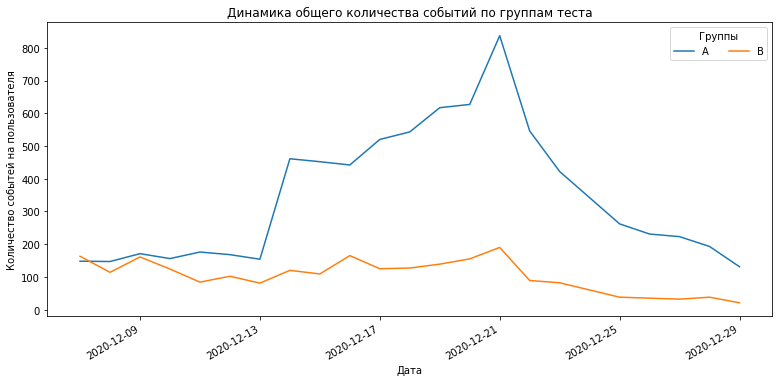

In [ ]:
# строим график
plt.figure(figsize=(13,6))
sns.lineplot(x = t['date'], y = t['number_events'] , hue = t['group'])
plt.legend(['А','B'], title='Группы',ncol = 3)
plt.title('Динамика общего количества событий по группам теста')
plt.ylabel('Количество событей на пользователя')
plt.xlabel('Дата')
plt.gcf().autofmt_xdate()
plt.show()

* **После 13 числа заметен большой всплеск и рост до 21 числа активности в группе А, что совпадает с всплеском уровня набора и в принципе также и объясняется этим, однако в группе В мы не наблюдаем схожей динамики - здесь активность стабильна и ниже контрольной на протяжении всего тетса.**

## Продуктовая варонка

In [ ]:
var[['A', 'B']].shift(periods=1)[['A']]

group,A
0,NaN
1,2604.0
2,1685.0
3,782.0


In [ ]:
# строим сводную таблицу
var = df.pivot_table(index='event_name', columns='group', values='user_id', aggfunc='nunique').reset_index()
var['num'] = var['event_name'].replace({'login':'1', 'product_page':'2',\
                                                     'product_cart':'3','purchase':'4'})
var = var.sort_values(by='num').copy().reset_index(drop=True)
var['share_first_step_a'] =  var['A']/var['A'].max()
var['share_first_step_b'] =  var['B']/var['B'].max()
var['share_last_step_a'] =  var['A']/var[['A', 'B']].shift(periods=1)['A']
var['share_last_step_b'] =  var['B']/var[['A', 'B']].shift(periods=1)['B']
var[['share_first_step_a','share_first_step_b','share_last_step_a','share_last_step_b']] = (round(var[['share_first_step_a','share_first_step_b','share_last_step_a','share_last_step_b']],2)-1)*100
display(var)

group,event_name,A,B,num,share_first_step_a,share_first_step_b,share_last_step_a,share_last_step_b
0,login,2604,876,1,0.0,0.0,NaN,NaN
1,product_page,1685,493,2,-35.0,-44.0,-35.0,-44.0
2,product_cart,782,244,3,-70.0,-72.0,-54.0,-51.0
3,purchase,833,249,4,-68.0,-72.0,7.0,2.0


In [ ]:
# построим график
fig = go.Figure()
fig.add_trace(go.Funnel(
    name = 'Группа А',
    x = var['A'],
    y = var['event_name'],
    textinfo = "value+percent initial+percent previous"))
fig.update_layout(title='Воронка событий по группам', title_x = 0.5,yaxis_title = 'События')

fig.add_trace(go.Funnel(
    name = 'Группа В',
    orientation = "h",
    x = var['B'],
    y = var['event_name'],
  #  textposition = "inside",
    textinfo = "value+percent initial+percent previous"))
fig.show();

* **На грифике мы можем заметить, что конверсия контрольной группы незначительно лучше конверсии опытной группы. Так же мы видим что целевой уровень прироста конверсии ни в одном из шагов не оправдал ожидания по испытуемой группе - ни в одном из них мы не получили 10% роста, а напротив получили понижение данного показателся. Стоит обратить внимани на то, что процент покупок выше чем процент просмотра корзины что говорит о не обязательной последовательности ее прохождения для пользователей. Целевое действие совершают 28% и 32% пользователй по группам B и А соответственно.**

* **По результатам теста в группе неудалось достичь челевого прирроста коныерсии ни на одном из шагов.**

# Вывод по итогам исследовательского анализа
* **Можно заметить, что группы распределились неравномерно, количество пользователей экспериментальной группы кратно меньше контрольной. Также можно обратить внимание на факт использование одного устройства всеми пользователями, что говорит об отслеживании активности пользователей по нему. Основная часть пользуется android устройствами, тогда как mac самый непопулярный. Пользователи совершают разное количество целевых действий, но основная часть ограничивается 2, также мы видим внушительную группу пользователей совершивших всего одно действие, возможно это быстрая покупка. В общей выборке  1082 пользователя из 3481 совершили покупки**
* **В испытуемой группе заметно ниже среднее число событий на пользователя, есть смысл проверить статистическую значимость данной данного вывода**
* **При выборе инструмента проверки статистических гипотез будем опираться на определение центральной предельной теоремы которое говорит о том, что при оценке среднего значения генеральной совокупности выборочные средние нормально распределены вокруг среднего всей совокупности независимо от того, как распределена сама генеральная совокупность, а также если некоторая доля генеральной совокупности обладает признаком, а другая её часть — нет, об этой доле можно судить по выборке из генеральной совокупности, выборочные доли будут нормально распределены вокруг настоящей. Исходя из того, что наша выборка имеет существенный размер для работы ЦПТ мы выберем z-test для определения различий в долях и ttest для определения различий средних значений, при условии, что дисперсии выборок равны**
* **По результатам теста мы видим, что уровень статистической значимости ниже выбранного значения alpha, поэтому у нас есть основания отвергнуть H0 гипотезу, статистически значимые различия в средних количествах событий на клиента в группах теста есть**
* **Можно заметить стабильно выше показатель активности на пользователя в группе А, а также всплеск в обеих группах 13 числа, что может быть связанно с повышенным притоком новых пользователей в этот момент. После всплеска показатель группы А остается на повышенном значении, а группы B планомерно снижается до конца наблюдений.**
* **На графике можно заметить, что в изменении доли платящих пользователей нет четкой динамики и существенных различий в обоих группах**
* **На графике мы можем заметить, что конверсия контрольной группы незначительно лучше конверсии опытной группы. Так же мы видим что целевой уровень прироста конверсии ни в одном из шагов не оправдал ожидания по испытуемой группе - ни в одном из них мы не получили 10% роста, а напротив получили понижение данного показателя. Стоит обратить внимание на то, что процент покупок выше чем процент просмотра корзины, что говорит о не обязательной последовательности ее прохождения для пользователей. Целевое действие совершают 28% и 32% пользователь по группам B и А соответственно.**

* **На основе проведенных выше исследований, можно сказать о плохой оргинизации теста ввиду неудочного выбора периода, пересечения пользователей со смежным тестом, а также неравномарности сформированных групп поэтому его результаты не будут иметь высокую точность и значимось**

# Оценка результатов А/B тестирования

## Сравнение долей конверсии z-критерием

In [ ]:
# задаем функцию  для проведения z теста
def z_prob_test(semple_a, semple_b , alpha = 0.05, bonf = 1):
    alpha = alpha/bonf
    p1= semple_a.mean()
    p2 = semple_b.mean()

    p_combined = (sum(semple_a) + sum(semple_b))/(semple_b.count() + semple_a.count())

    difference  = p1 - p2

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/semple_a.count() + 1/semple_b.count()))

    distr = st.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2


    print('a n:         ', semple_a.count())
    print('b n:         ', semple_b.count())
    print('p_combined:  ', p_combined)
    print('z-value:  ', z_value)
    print('p-value:  ', p_value)
    print(f"Абсолютное различие вероятностей оттока между b и a равно : {round(((semple_b.values.mean() - semple_a.values.mean())), 3)}")

    if p_value < alpha:

      print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
      print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
      )

* **Проведем 3 папатных теста о различии долей конверсии между целевой и контрольной группами для каждого шага воронки. Для учета множественного сравнения будем использовать паправку Боннферони**

## Гипотеза :
* **В группе B значимо выше уровень конверсии по сравнению с группой A**

H0 = пропорции между конверсией в группах А и В не имеют статистических различий
****
H1 = пропорции между конверсией в группах А и В имеют статистические различия
****

критический уровень значимости alpha = 0.05

### Конверсия в просмотр карточки

In [ ]:
# формируем семплы
product_page_a = pd.Series((var['A'][0] - var['A'][1])*[0] +(var['A'][1]*[1]))
product_page_b = pd.Series((var['B'][0] - var['B'][1])*[0] +(var['B'][1]*[1]))

In [ ]:
# проводим тест
z_prob_test(product_page_a, product_page_b, bonf = 3)

a n:          2604
b n:          876
p_combined:   0.6258620689655172
z-value:   4.459999720013724
p-value:   8.195976000324734e-06
Абсолютное различие вероятностей оттока между b и a равно : -0.084
Отвергаем нулевую гипотезу: между долями есть значимая разница


* **По результатам теста мы видим, что уровень статистической значимости выше выбранного значения alpha, поэтому у нас есть достаточного основания отвергнуть H0 гипотезу, статистически значимые различия в уровне конверсии между группами есть**

### Конверсия в просмотр корзины

In [ ]:
# формируем семплы
product_cart_a = pd.Series((var['A'][0] - var['A'][2])*[0] +(var['A'][2]*[1]))
product_cart_b = pd.Series((var['B'][0] - var['B'][2])*[0] +(var['B'][2]*[1]))

In [ ]:
# проводим тест
z_prob_test(product_cart_a, product_cart_b, bonf = 3)

a n:          2604
b n:          876
p_combined:   0.29482758620689653
z-value:   1.2223001125047235
p-value:   0.2215941567364419
Абсолютное различие вероятностей оттока между b и a равно : -0.022
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


* **По результатам теста мы видим, что уровень статистической значимости ниже выбранного значения alpha, поэтому у нас нет достаточного основания отвергнуть H0 гипотезу, статистически значимых различий в уровне конверсии между группами нет**

### Конверсия в покупки

In [ ]:
# формируем семплы
purchase_a = pd.Series((var['A'][0] - var['A'][3])*[0] +(var['A'][3]*[1]))
purchase_b = pd.Series((var['B'][0] - var['B'][3])*[0] +(var['B'][3]*[1]))

In [ ]:
# проводим тест
z_prob_test(purchase_a, purchase_b, bonf = 3)

a n:          2604
b n:          876
p_combined:   0.31091954022988505
z-value:   1.971666704350226
p-value:   0.04864766695042433
Абсолютное различие вероятностей оттока между b и a равно : -0.036
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


* **По результатам теста мы видим, что уровень статистической значимости выше выбранного значения alpha, поэтому у нас есть достаточного основания отвергнуть H0 гипотезу, статистически значимые различия в уровне конверсии между группами есть, однако величина различий крайне мала и ей можно пренибреч**

* **В результате проведения А/В теста значимая разница между группами прослеживается только на этапе просмотра карточек товара правда в отрицательную сторану, что косается перехода в корзину и покупки товара - здесь существенной разницы нет, а в случае с покупками она очень мала хоть и имеет статистическую значимось. Ожидаемого эффекта достигнуто не было.**

# Общий вывод

# Вывод по итогам предобработки
* **Таблица marketing_events**
* **Таблица содержит данные о 14 уникальных маркетинговых событиях проводимых в разное времяв разных регионах. Значения дат начала и конца акции переведем в нужный формат для корректной работы с ними**
* **Таблица new_users**
* **Можно заметить отсутствие пропусков и дубликатов, а таже неверный формат дат. Всего представлено 61733 уникальных пользователя**
* **Можно заметить что дынные представлены за декабрь 2020 года, что есть не самое подходяшие время для проведение A/B тестов ввиду большого количества событий в этого время и как следствие, изменения модели поведения покупателей. Также мы видем, что пользователи относятся к 4 регионам, но подавляющее их число в нашем наборе представляют европейский регион - 46 270 против 15 463 в остальных. Основная часть пользователий используют андройд платформу.**
* **Таблица events**
* **Данные представлены 440317 событиями, для каждого пользователя может быть их разное количество. Можно заметить неверный формат даты а также большое количество пропусков в поле с детялями события, последнее можно обьяснить наличием событий без деталей**
* **Можно обратить внимание, что в данных 4 уникальных события это login, product_page, product_cart, product_cart причем регистраций кратно больше чем просмотров карзины и покупок. Так же мы видим что количество значений без пропусков равно количеству покупок, из чего следует что поле с деталями может содержать сумму потраченную на покупку товара, которая в свою очередь представлена 4 уникальными значениями.**
* **Таблица participants**
* **Пропусков нет, форматы верные. Количество дублей пользователей 1602, что может говорить либо о некорректном наборе участников либо о присутствии в данных лишней информации. Необходима проверка**
* **Мы видим, что основная часть набора участвовала в нецелевом тесте исследования, полные дубли отсутствуют. Общее количество участников тестирований в группе в незначительно меньше группы а. Необходима проверка пересечения групп пользователей между тестами.**


# Вывод по итогам оценки корректности проведения теста
* **В целевую группу попали пользователи не только из исследуемого региона, необходимо очистить данные. Распределение по группам также неравномерно**
* **Пользователи набраны согласно т.з с 7 по 21 число включительно. Период проведения A/B теста выбран не совсем корректно, ввиду предновогоднего изменения модели поведения покупателей и большого количества маркетинговых акций проводимых в это время**
* **Доля пользователей набрана корректно согласно техническому заданию**
* **Можно заметить, что пользователи набиралось в группы циклично, на выходных проходил рост набора. Также мы видим, что в группу, а попадало стабильно больше пользователей относительно контрольной группы, ввиду чего пропорциональность групп не была соблюдена**
* **Можно заметить, что маркетинговые cобытия не пересекают период набора пользователей, однако одно событие (Christmas&New Year Promo) накладывается на период наблюдения и сбора статистики активности, что может исказить результаты. Необходимо обратить внимание на изменения активности с 25 числа**
* **Пересечение пользователей внутри теста между контрольной и тестовой группой нет**
* **Критичным будем считать пересечение пользователей между группами внутри теста, а также пересечение испытуемой группы смежного теста с нашим. Пересечение контрольной группы смежного теста с группами нашего целевого будем считать допустимым так как они не подвергались дополнительному воздействию экспериментов.**
* **Доля пользователей подвергшихся воздействию смежного теста в обеих группах примерно равна и составляет порядка 5%, ввиду чего можно считать воздействие на группы этого факта также равномерным. Поэтому, исходя из ограниченного размера груп, возможно оставить таких пользователей, для придания большей мощности нашей аналитики**
* **Пользователи, попавшие в тест, совершили 26290 события из которых 3196 покупки. Можно заметить наличие пропусков после объединение по полям из контрольной таблицы, что говорит о том, что некоторые пользователи из группы теста не совершили не одного события.**
* **Период активности группы тета совпадает с периодом регистрации пользователей и периодом наблюдения за ними. Активность пользователей растет вплоть до остановки набора пользователей в группы, причем можно заметит скачек активности 13 числа. Также мы можем наблюдать, что после остановки набора теста активность пользователей резко снижается вплоть до 30 числа, а последние 4 дня наблюдений и вовсе отсутствует, что может говорить о несвоевременной остановке теста, либо о новогодних каникулах. Возможность для совершения событий последних зарегистрированных пользователей составляет 2 недели(если тест не был досрочно остановлен, при обратном сценарии необходимо корректировать после анализа распределений сроков целевых событий). Ввиду большого количества пользователей без наличия целевых действий есть смысл провести динамику набора последних. Существенных всплесков активности в период проведения пересекающейся акции нет**
* **Можно заметить, что пользователи не совершившие не одного действия набирались в весь период, причем набор проходил схожим образом в обеих группах. В контрольной группе после 13 числа наблюдается отсутствие притока клиентов без активности, что довольно странно, в группы у неактивных пользователей проходит относительно равномерно на протяжении всего теста.**
* **Доля пользователей без событий в экспериментальной группе равна 68%**
* **Доля пользователей без событий в контрольной группе равна 28%**
* **Основная честь всех событий совершается в период до 5 дней, однако по каждому виду событий видны выбросы за периодом установленного т.з. Лайф тайма события. Также мы можем заметить снижение средних сроков до покупки, просмотра карточки и просмотра корзины в экспериментальной группе.**
* **Можно заметить, что доля клиентов с первой покупкой на 5% выше в группе А и составляет 32%, тогда как в группе B больше на 5%  доля первых логинов. В общем мы можем наблюдать довольно высокую долю клиентов с первым событием - покупкой порядка 30% по общей выборке.**


# Вывод по итогам исследовательского анализа
* **Можно заметить, что группы распределились неравномерно, количество пользователей экспериментальной группы кратно меньше контрольной. Также можно обратить внимание на факт использование одного устройства всеми пользователями, что говорит об отслеживании активности пользователей по нему. Основная часть пользуется android устройствами, тогда как mac самый непопулярный. Пользователи совершают разное количество целевых действий, но основная часть ограничивается 2, также мы видим внушительную группу пользователей совершивших всего одно действие, возможно это быстрая покупка. В общей выборке  1082 пользователя из 3481 совершили покупки**
* **В испытуемой группе заметно ниже среднее число событий на пользователя, есть смысл проверить статистическую значимость данной данного вывода**
* **При выборе инструмента проверки статистических гипотез будем опираться на определение центральной предельной теоремы которое говорит о том, что при оценке среднего значения генеральной совокупности выборочные средние нормально распределены вокруг среднего всей совокупности независимо от того, как распределена сама генеральная совокупность, а также если некоторая доля генеральной совокупности обладает признаком, а другая её часть — нет, об этой доле можно судить по выборке из генеральной совокупности, выборочные доли будут нормально распределены вокруг настоящей. Исходя из того, что наша выборка имеет существенный размер для работы ЦПТ мы выберем z-test для определения различий в долях и ttest для определения различий средних значений, при условии, что дисперсии выборок равны**
* **По результатам теста мы видим, что уровень статистической значимости ниже выбранного значения alpha, поэтому у нас есть основания отвергнуть H0 гипотезу, статистически значимые различия в средних количествах событий на клиента в группах теста есть**
* **Можно заметить стабильно выше показатель активности на пользователя в группе А, а также всплеск в обеих группах 13 числа, что может быть связанно с повышенным притоком новых пользователей в этот момент. После всплеска показатель группы А остается на повышенном значении, а группы B планомерно снижается до конца наблюдений.**
* **На графике можно заметить, что в изменении доли платящих пользователей нет четкой динамики и существенных различий в обоих группах**
* **На графике мы можем заметить, что конверсия контрольной группы незначительно лучше конверсии опытной группы. Так же мы видим что целевой уровень прироста конверсии ни в одном из шагов не оправдал ожидания по испытуемой группе - ни в одном из них мы не получили 10% роста, а напротив получили понижение данного показателя. Стоит обратить внимание на то, что процент покупок выше чем процент просмотра корзины, что говорит о не обязательной последовательности ее прохождения для пользователей. Целевое действие совершают 28% и 32% пользователь по группам B и А соответственно.**
* **По результатам теста мы видим, что уровень статистической значимости выше выбранного значения alpha, поэтому у нас есть достаточного основания отвергнуть H0 гипотезу, статистически значимые различия в уровне конверсии между группами есть, однако величина различий крайне мала и ей можно пренибреч**

# Реккомендации:
* **Итоги теста можно принять с допущением о его низкой точности и малой значимости ввиду ошибок при его оргинизации, имеет смысл повторного теста с корректировками**
* **По итогам теста улучшений в уровне конверсии не выявлено на всех ступенях воронки, а в случае с просмотрами карточек напротив - значимое ухудшение**